# Praca Domowa 6

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Zadania

### Zadanie 1

a) Narysować wykres y=x^3+1 dla x z przedziału [-3, 3]. Dodać wycentrowany tytuł oraz opisy osi.

b) Do tego samego wykresu dodać wybraną inną funkcję i oznaczyć ją linią o innym kolorze i grubości. Dodać legendę.

c) Pokazać wykresy z a) i b) osobno używając funkcji subplot().

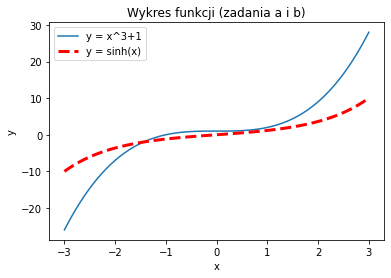

In [23]:
x1 = np.linspace(-3, 3, 100)
y1 = np.add(np.power(x1, 3), 1)
y2 = np.sinh(x1) 
plt.plot(x1, y1)
plt.plot(x1, y2, "r--", linewidth=3)
plt.title("Wykres funkcji (zadania a i b)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["y = x^3+1", "y = sinh(x)"])
plt.show()

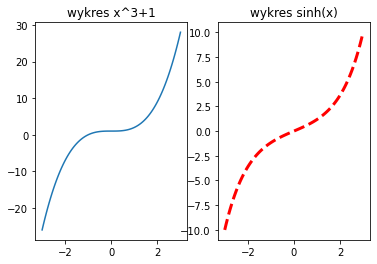

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x1, y1)
ax1.title.set_text("wykres x^3+1")
ax2.plot(x1, y2, "r--", linewidth = 3)
ax2.title.set_text("wykres sinh(x)")

# Zadanie 2

a) Narysować wykres słupkowy na podanych danych.

b) Znaleźć sposób (w internecie) na narysowanie wykresu kołowego na podanych danych.
 

In [25]:
labels = ['Blue', 'Red', 'Green', 'Purple']
sizes = [15, 30, 45, 10]

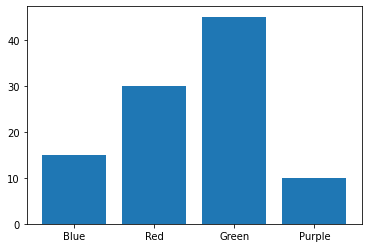

In [26]:
plt.bar(labels, sizes)
plt.show()

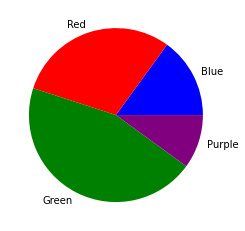

In [27]:
plt.pie(sizes, labels=labels, colors=["b","r","g","purple"])
plt.show()

# Zadanie 3

Poprawić wykres tak, aby łatwiej było odczytać w którym województwie śmiertelność wzrosła najbardziej.
Jest przynajmniej kilka innych podejść: scatterplot z latami na osi OX/OY, odcinki zaczynające się w danych ze średniej a kończące w 2020.
Jestem też ciekawa Waszych innych pomysłów.

![https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png](https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png)

Źródło: https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png

In [28]:
wojewodztwo = ["ZACHODNIOPOMORSKIE", "WIELKOPOLSKIE", "WARMINSKO-MAZURSKIE", "SWIETOKRZYSKIE",  "SLASKIE", "POMORSKIE", "PODLASKIE", "PODKARPACKIE", "OPOLSKIE", "MAZOWIECKIE", "MALOPOLSKIE", "LODZKIE", "LUBUSKIE", "LUBELSKIE", "KUJAWSKO-POMORSKIE", "DOLNOSLASKIE"]

l_2020 = [1874, 4013, 1565, 2008, 6270, 2521, 1468, 2909, 1356, 6564, 4743, 3687, 1313, 2731, 2435, 3665]

l_2015_2019 = [1509, 2796, 1241, 1208, 4255, 1830, 1049, 1643, 881, 4811, 2690, 2578, 894, 1920, 1768, 2683]

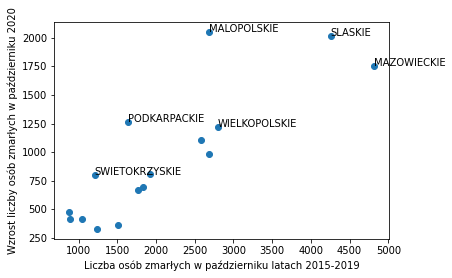

In [29]:
highlights = ["MAZOWIECKIE", "SLASKIE", "MALOPOLSKIE", "WIELKOPOLSKIE", "PODKARPACKIE", "SWIETOKRZYSKIE"]
plt.scatter(l_2015_2019, np.subtract(l_2020, l_2015_2019))
plt.xlabel("Liczba osób zmarłych w październiku latach 2015-2019")
plt.ylabel("Wzrost liczby osób zmarłych w październiku 2020")
for i,txt in enumerate(wojewodztwo):
    if txt in highlights:
        plt.text(l_2015_2019[i], np.subtract(l_2020, l_2015_2019)[i], txt)
plt.show()

# Zadanie 4

Zrobić własny wykres w stylu xkcd dotyczący wizualzacji danych. Może być bardzo luźno związany.

Jeśli ktoś nie trafił na komiksy xkcd, to polecam przejrzeć zajrzeć na stronę Randalla Munroe: https://xkcd.com/

Tu kilka przykładów, które mogą być inspiracją albo chociaż rozrywką:
- https://xkcd.com/688/
- https://xkcd.com/1597/ - True story jak Wam pokazałam gita :(
- https://xkcd.com/1945/

Matplotlib pozwala na proste tworzenie wykresów w stylu xkcd, służy do tego funkcja `xkcd()` z `matplotlib.pyplot`.
Warto zajrzeć do dokumentacji: https://matplotlib.org/gallery/showcase/xkcd.html
Mój przykład umieściłam poniżej.

Uwaga, w szczególności styl działa też z wykresami kołowymi i słupkowymi.

### Przykład

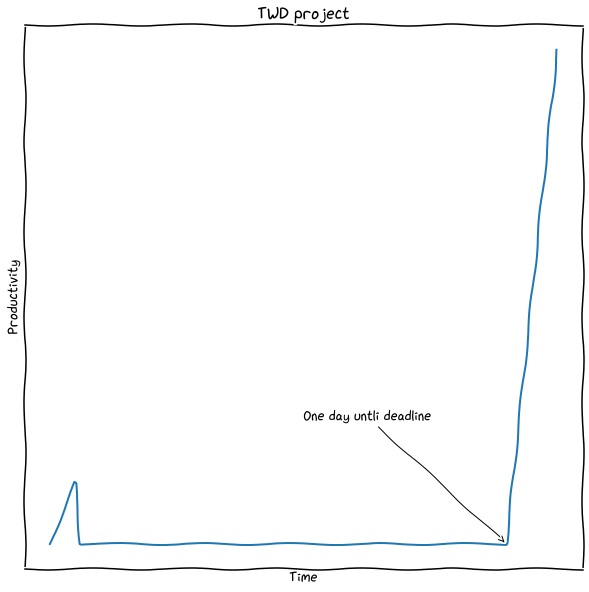

In [7]:
x = [0, 0.05, 0.06, 0.9, 1]
y = [0, 0.5, 0, 0, 4]

# rysowanie w xkcd mode
with plt.xkcd():
    # ustawienie rozmiaru
    plt.figure(figsize=(10,10))
    
    plt.plot(x,y)
    
    # usuniecie podpisow osi
    plt.xticks([])
    plt.yticks([])
    
    # dodanie napisow
    plt.title("TWD project")
    plt.xlabel('Time')
    plt.ylabel('Productivity')

    plt.annotate(
        'One day untli deadline',
        xy=(0.9, 0), arrowprops=dict(arrowstyle='->'), xytext=(0.5, 1))
plt.show()

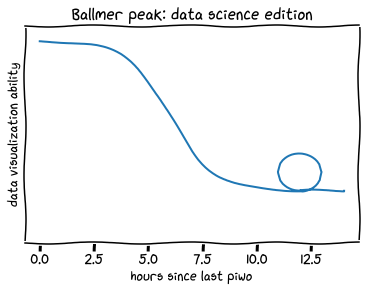

In [37]:
def siup(x, size=0.25, pos=12, over=False):
    size_sq = size **2
    if over:
        return np.sqrt(size_sq- size_sq*(x-pos)**2) - (1-size)
    else:
        return -np.sqrt(size_sq - size_sq*(x-pos)**2) - (1-size)



with plt.xkcd():
    xslide = np.linspace(0, 12, 150)
    
    xloop_up = np.linspace(12.1, 13, 10)
    xloop_over = np.linspace(12.9, 11, 20)
    xloop_down = np.linspace(11.1, 12, 10)
    
    xafter = np.linspace(12, 14, 40)
    
    x4 = np.concatenate((xslide, xloop_up, xloop_over, xloop_down, xafter))
    
    yslide = -2/(1 + np.exp(-xslide+6))+1
    
    yloop_up = siup(xloop_up)
    yloop_over = siup(xloop_over, over=True)
    yloop_down = siup(xloop_down)
    
    yafter = -2/(1 + np.exp(-xafter+6)) +1
    
    y4 = np.concatenate((yslide, yloop_up, yloop_over, yloop_down, yafter))
    plt.plot(x4, y4)
    plt.yticks([])
    plt.ylim(-1.7, 1.2)
    plt.xlabel("hours since last coffee")
    plt.ylabel("data visualization ability")
    plt.title("Ballmer peak: data science edition")
    plt.show()